# **1. Perkenalan Dataset**


Langkah awal dalam proyek ini adalah mencari serta menggunakan dataset yang sesuai dengan kriteria yang telah ditentukan. Salah satu dataset yang direkomendasikan adalah **Stroke Prediction Dataset**.

1. **Sumber Dataset**

   Dataset ini tersedia di platform Kaggle dan dapat diakses melalui tautan berikut: [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data).
   Dataset tersebut memuat 5.110 entri dan 12 atribut, yang merekam berbagai informasi medis dan demografis pasien terkait risiko stroke.

2. **Deskripsi Variabel**

   Berikut ini adalah daftar fitur atau kolom yang terdapat dalam dataset beserta penjelasannya:

   * `id`: Nomor identifikasi unik setiap pasien
   * `gender`: Jenis kelamin pasien, terdiri dari "Male", "Female", atau "Other"
   * `age`: Usia pasien
   * `hypertension`: Menunjukkan apakah pasien memiliki hipertensi (1 = ya, 0 = tidak)
   * `heart_disease`: Status penyakit jantung pasien (1 = memiliki, 0 = tidak)
   * `ever_married`: Status pernikahan pasien ("Yes" atau "No")
   * `work_type`: Jenis pekerjaan, seperti "children", "Govt\_job", "Never\_worked", "Private", atau "Self-employed"
   * `Residence_type`: Tempat tinggal pasien, apakah di "Urban" atau "Rural"
   * `avg_glucose_level`: Rata-rata kadar glukosa dalam darah
   * `bmi`: Indeks massa tubuh (Body Mass Index)
   * `smoking_status`: Status merokok pasien, yaitu "formerly smoked", "never smoked", "smokes", atau "Unknown"\*
   * `stroke`: Target variabel, 1 jika pasien pernah mengalami stroke, 0 jika tidak

   > \*Catatan: Nilai "Unknown" pada kolom `smoking_status` menunjukkan bahwa informasi tersebut tidak tersedia untuk pasien terkait.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import joblib
import os

import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset
!unzip stroke-prediction-dataset.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
License(s): copyright-authors
  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 179MB/s]
Archive:  stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


In [3]:
df_stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 4.1 Cek Missing value

In [5]:
df_stroke.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


## 4.2 Cek Data Duplikat

In [6]:
df_stroke.duplicated().sum()

np.int64(0)

**Insight**:

- Dari hasil analisis missing value, hanya kolom bmi yang memiliki data hilang sebanyak 201 nilai dari total 5110 data, sehingga dilakukan imputasi menggunakan median.
- Tidak ada duplikasi dalam dataset

## 4.3 Heatmap Korelasi untuk fitur numerik

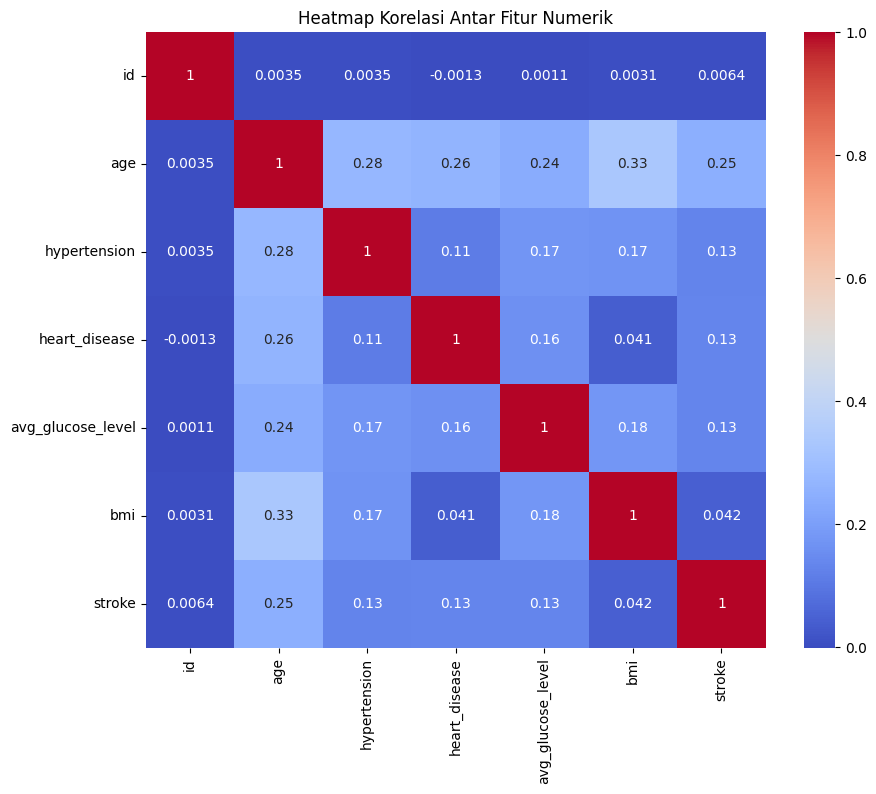

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_stroke.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()

**Insight**:

Heatmap menunjukkan bahwa tidak ada korelasi yang kuat antar fitur numerik dalam dataset ini. Korelasi tertinggi adalah antara age dan bmi (0.33), karena usia berpengaruh terhadap indeks massa tubuh. Korelasi stroke dengan fitur lain tergolong lemah, di bawah 0.15, yang menandakan bahwa fitur-fitur numerik secara langsung tidak punya hubungan linier yang kuat terhadap kejadian stroke. Namun, fitur-fitur tersebut tetap bisa penting dalam model prediktif non-linear.

## 4.4 Value Count untuk Setiap Kolom Kategorikal

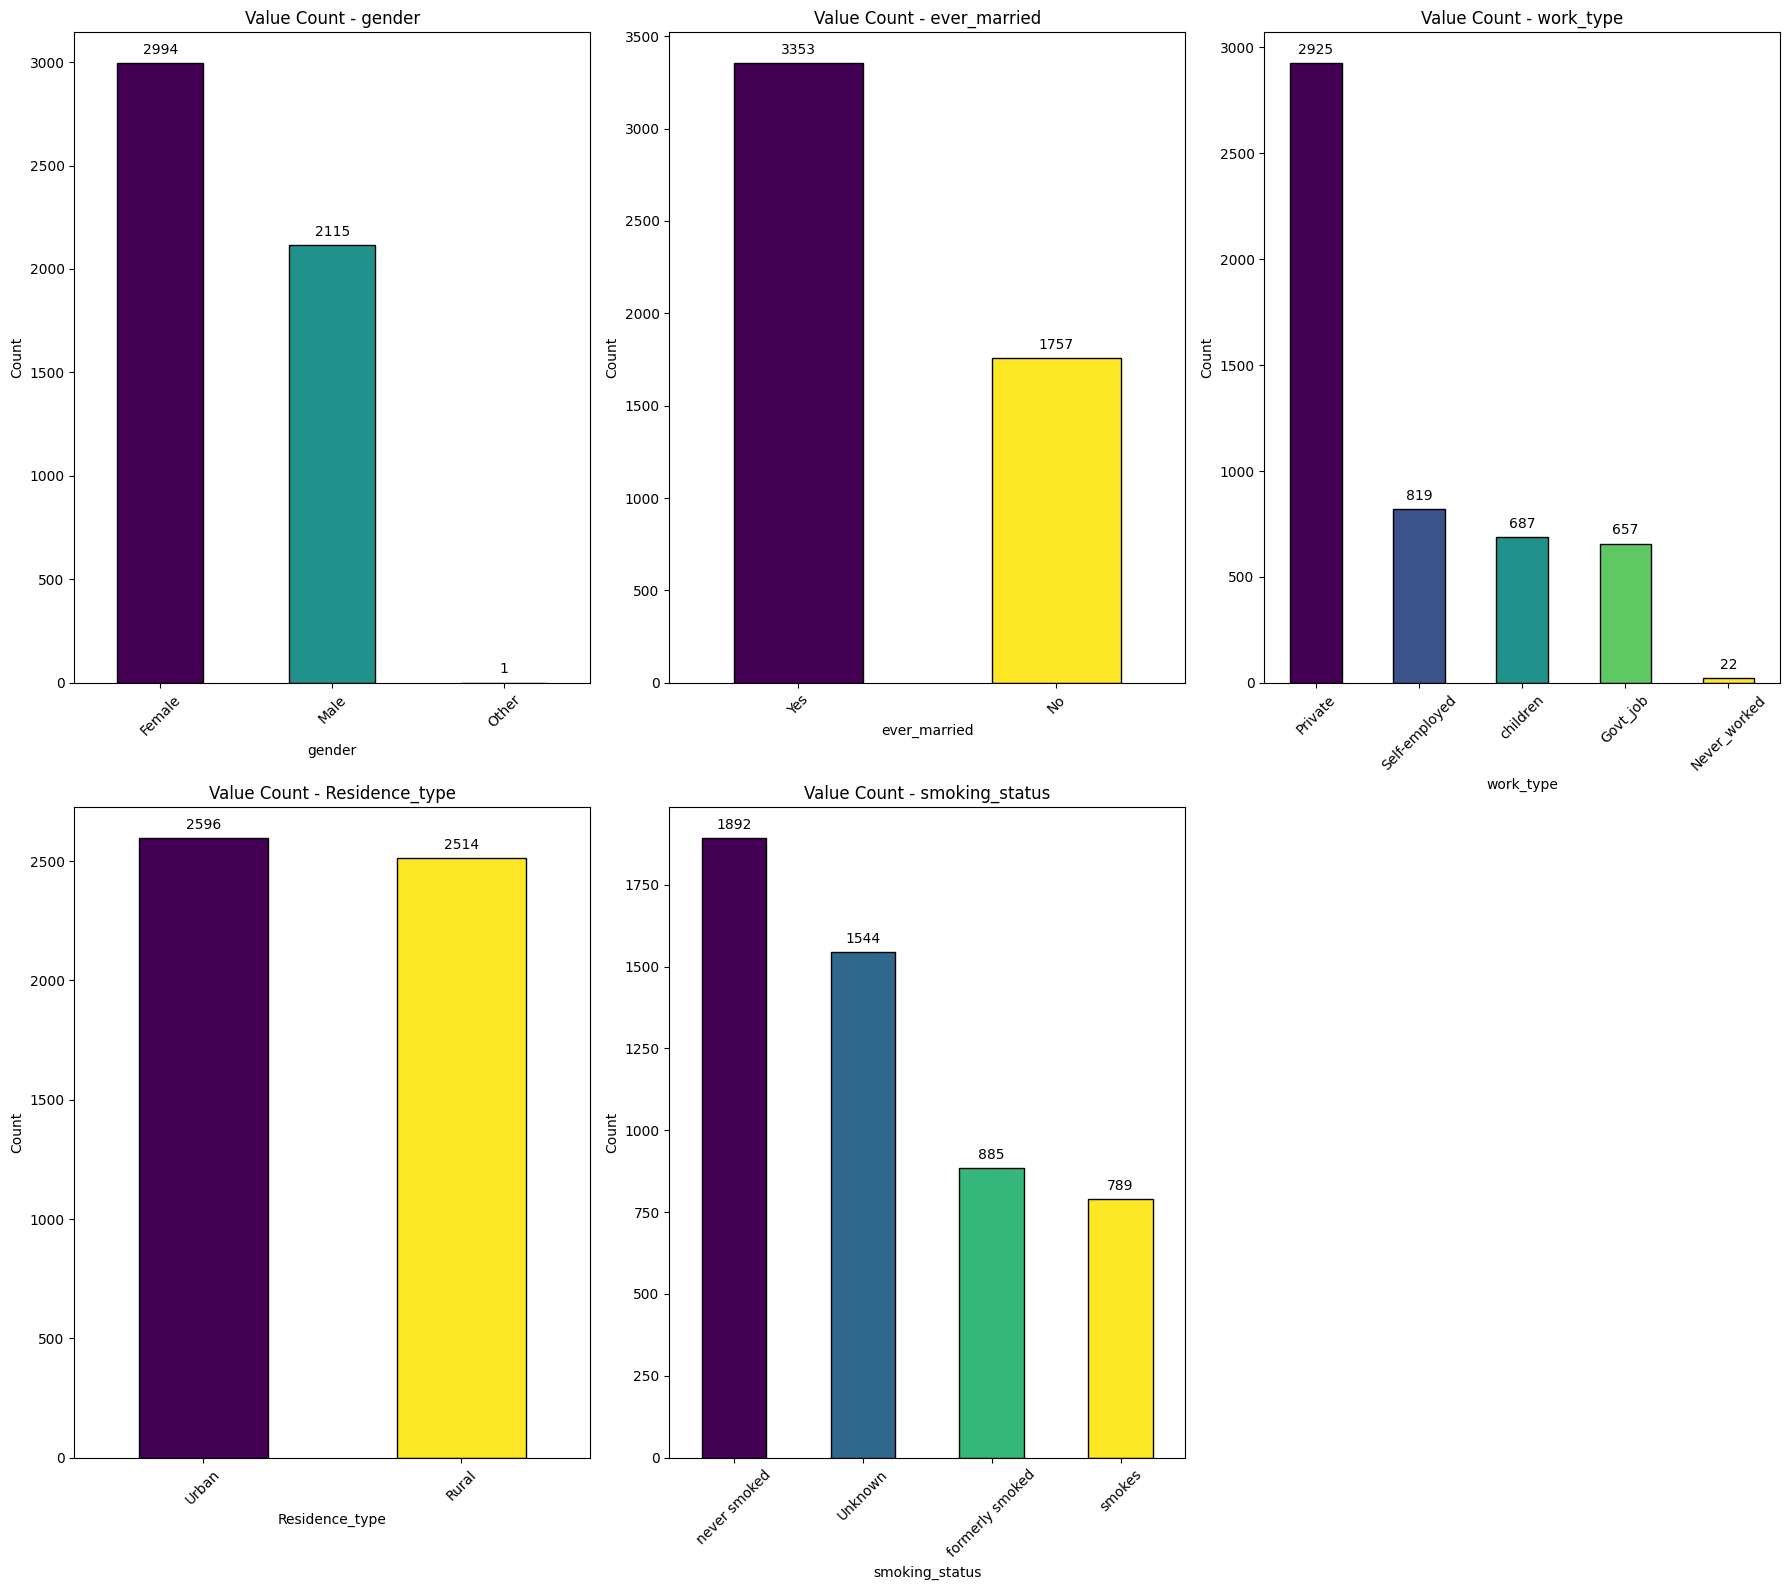

In [8]:
categorical_columns = df_stroke.select_dtypes(include=['object']).columns
n_cols = 3
n_rows = (len(categorical_columns) // n_cols) + (1 if len(categorical_columns) % n_cols else 0)

plt.figure(figsize=(18, 8 * n_rows))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(n_rows, n_cols, i)

    value_counts = df_stroke[col].value_counts()
    colors = cm.viridis(np.linspace(0, 1, len(value_counts)))

    ax = value_counts.plot(kind='bar', color=colors, edgecolor='black')
    plt.title(f'Value Count - {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height() + max(value_counts)*0.01),
                    ha='center', va='bottom', fontsize=10, rotation=0)

plt.tight_layout()
plt.show()

**Insight**:
- gender: didominasi oleh Female, tapi data cukup representatif untuk Male. Hapus baris dengan gender = 'Other'.
- ever_married: mayoritas responden sudah menikah (Yes).
- work_type: paling banyak bekerja di sektor Private, sementara Never_worked sangat sedikit, sehingga Never_worked dan children digabung menjadi 'Other' di kolom work_type.
- Residence_type: distribusi antara Urban dan Rural hampir seimbang.
- smoking_status: banyak responden yang never smoked, namun proporsi Unknown juga cukup signifikan.

## 4.5 Distribusi Data Numerik

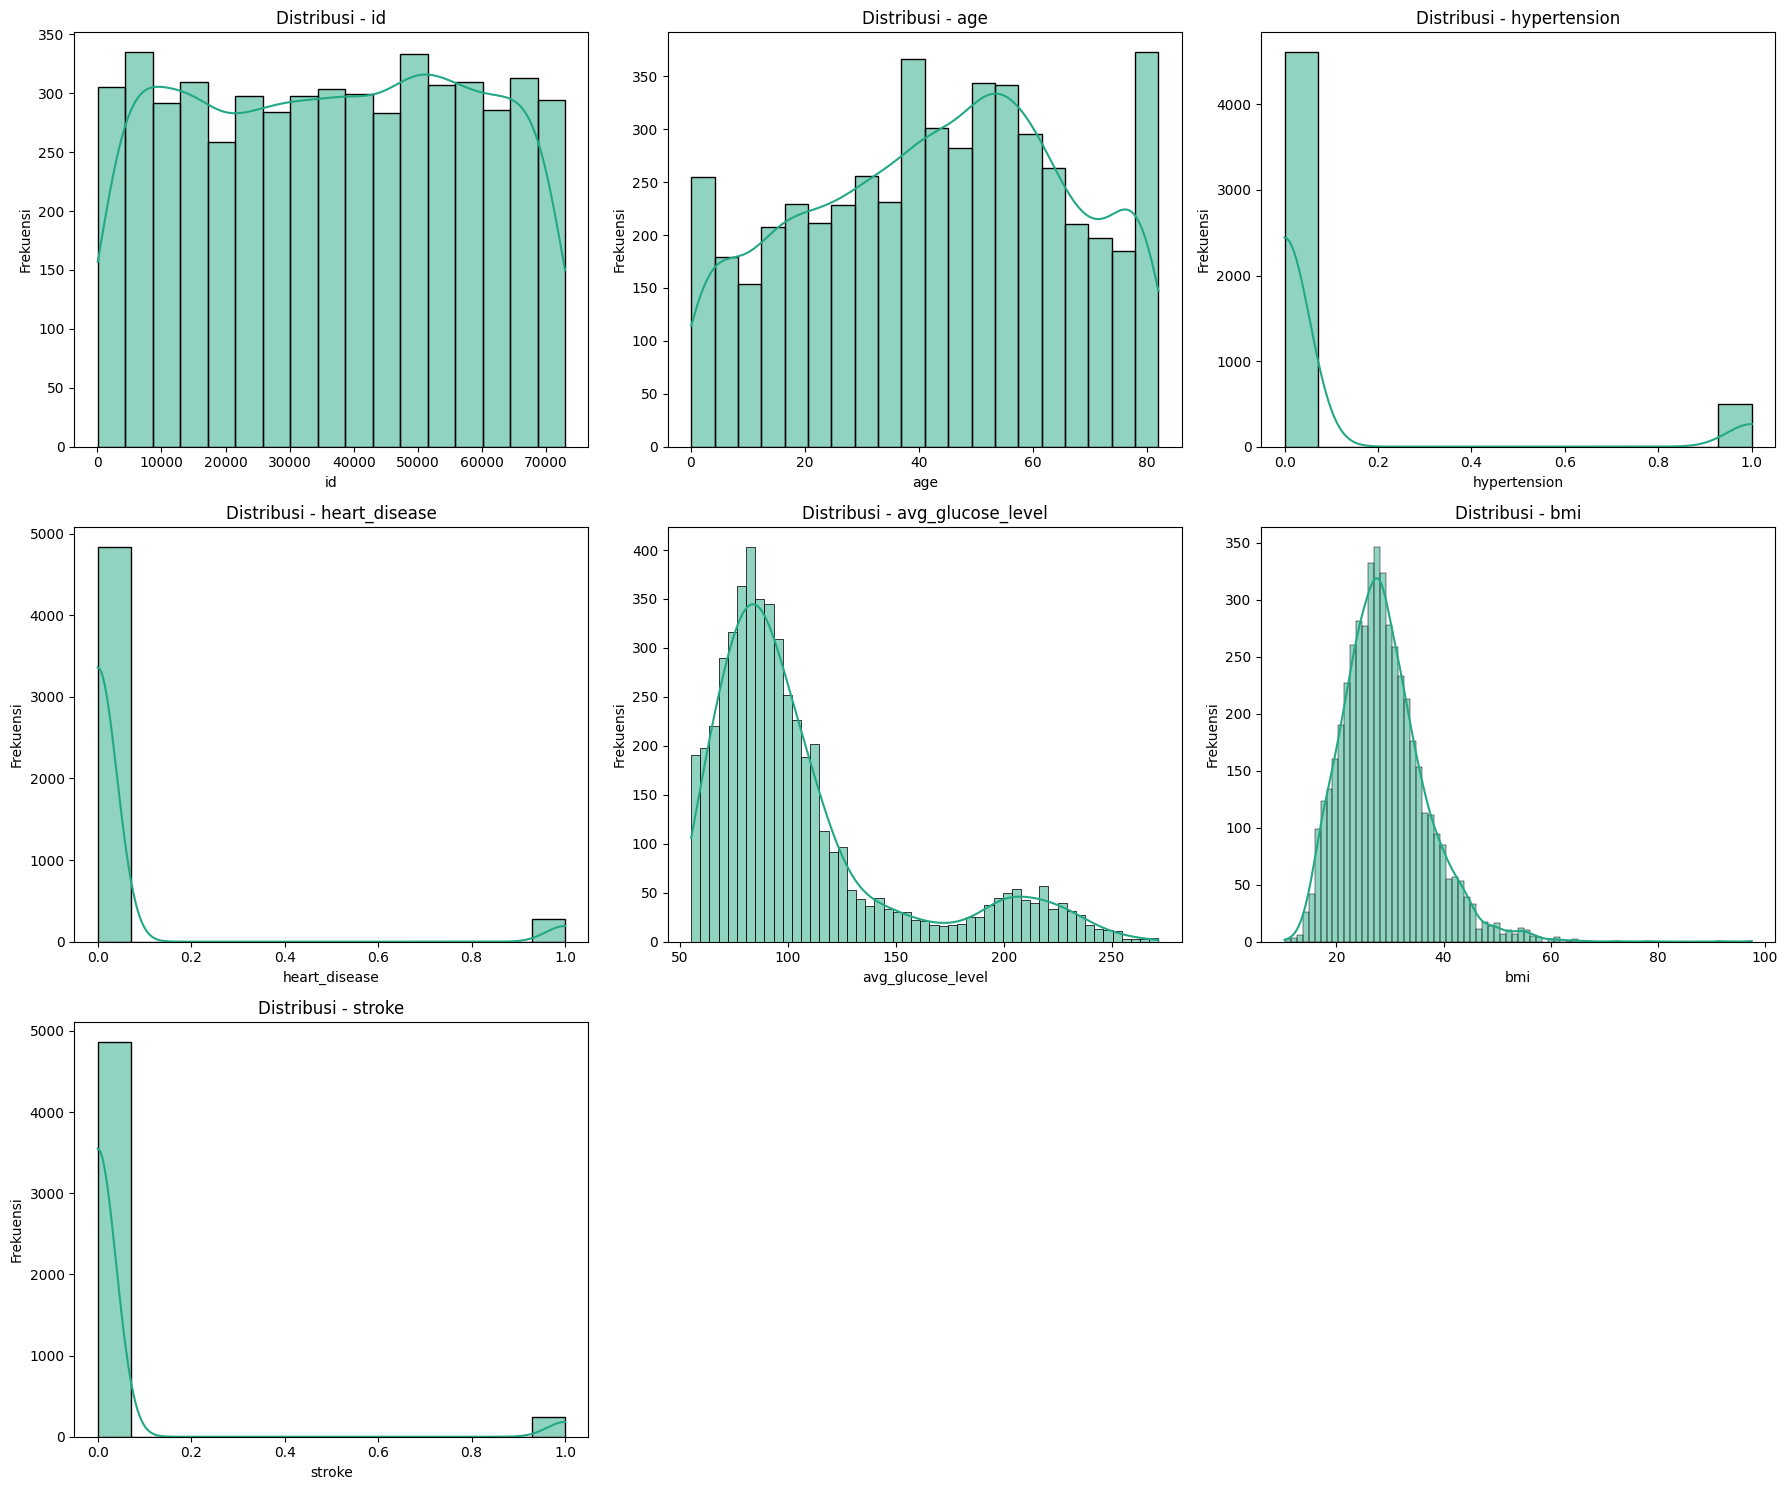

In [9]:
numerical_columns = df_stroke.select_dtypes(include=['int64', 'float64']).columns
n_cols = 3
n_rows = (len(numerical_columns) // n_cols) + (1 if len(numerical_columns) % n_cols else 0)

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)

    sns.histplot(df_stroke[col], kde=True, color=cm.viridis(0.6))
    plt.title(f'Distribusi - {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

**Insight**:
- age: menyebar merata dari usia muda hingga lanjut, dengan puncaknya di usia produktif.
- avg_glucose_level: cenderung bimodal, menandakan dua kelompok besar, mungkin antara penderita diabetes dan bukan.
- bmi: mengikuti distribusi mirip normal, dengan skew ke kanan (outlier pada nilai tinggi).
- Sementara variabel biner seperti hypertension, heart_disease, dan stroke sangat skewed ke arah 0, menandakan ketidakseimbangan data (class imbalance) yang perlu diperhatikan saat pemodelan.

## 4.6 Deteksi Outlier

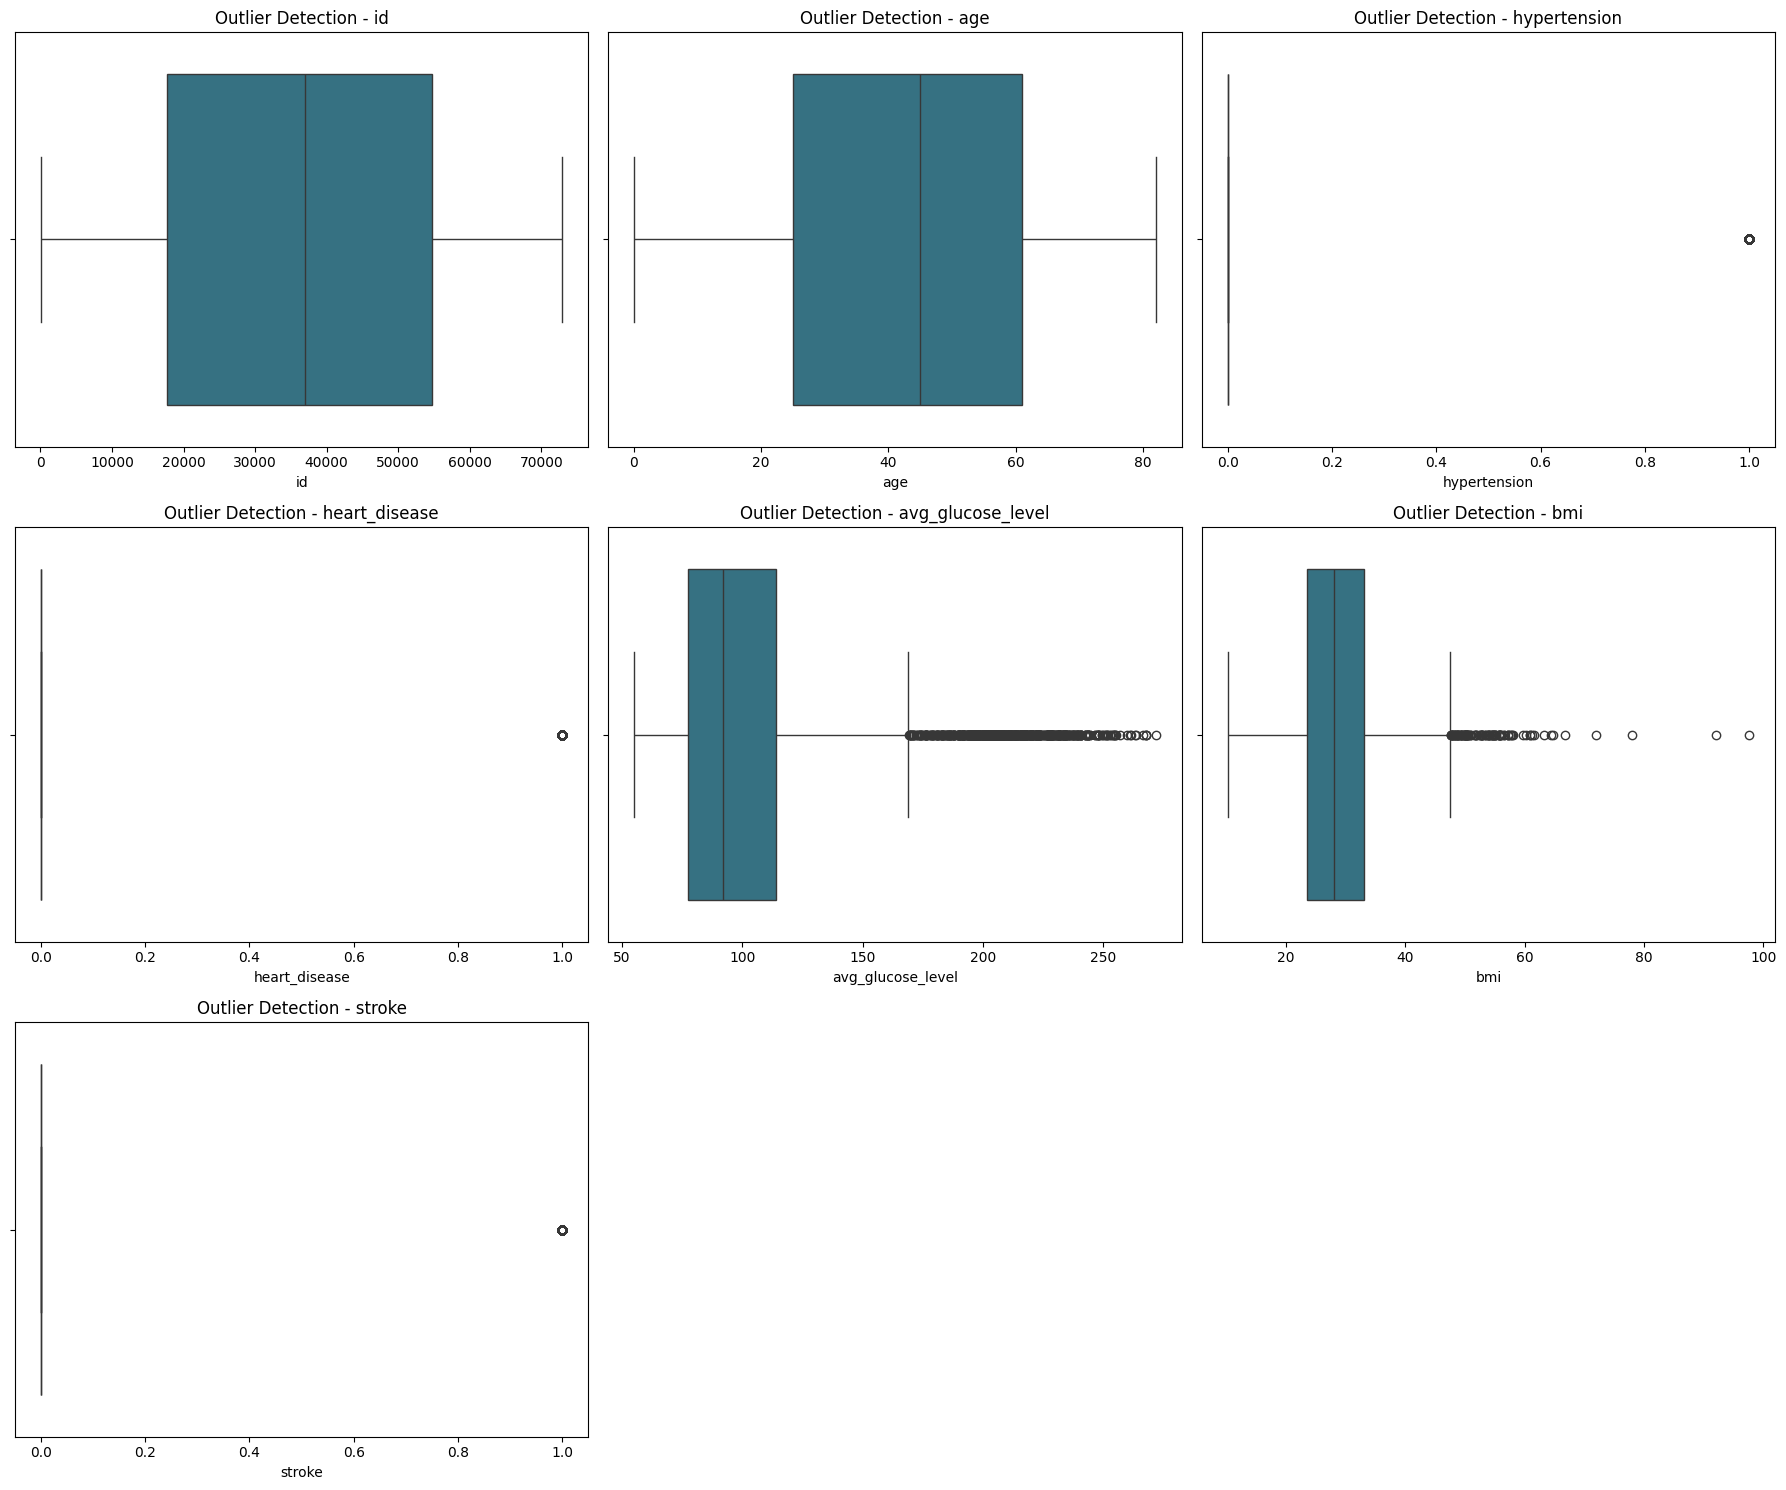

In [10]:
plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)

    sns.boxplot(x=df_stroke[col], color=cm.viridis(0.4))
    plt.title(f'Outlier Detection - {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [11]:
# Cek Outlier dengan IQR (Interquartile Range)
Q1 = df_stroke[numerical_columns].quantile(0.25)
Q3 = df_stroke[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_stroke[numerical_columns] < (Q1 - 1.5 * IQR)) | (df_stroke[numerical_columns] > (Q3 + 1.5 * IQR))).sum()

print("\nOutlier Count (by IQR method):")
print(outliers)


Outlier Count (by IQR method):
id                     0
age                    0
hypertension         498
heart_disease        276
avg_glucose_level    627
bmi                  110
stroke               249
dtype: int64


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [12]:
# Drop kolom id
df_healthcare = df_stroke.drop('id', axis=1, inplace=True)

In [13]:
# Drop baris gender == 'Other'
df_healthcare = df_stroke[df_stroke['gender'] != 'Other']

In [14]:
# Gabungkan kategori minoritas di work_type
df_healthcare['work_type'] = df_healthcare['work_type'].replace({
    'children': 'Other',
    'Never_worked': 'Other'
})

In [15]:
# Imputasi missing value kolom BMI dengan median
df_healthcare['bmi'] = df_healthcare['bmi'].fillna(df_healthcare['bmi'].median())

In [16]:
# Label Encoding
label_encoders = {}
label_enc_cols = ['ever_married', 'Residence_type', 'gender']
for col in label_enc_cols:
    le = LabelEncoder()
    df_healthcare[col] = le.fit_transform(df_healthcare[col])
    label_encoders[col] = le  # simpan encoder untuk masing-masing kolom

In [17]:
# One Hot Encoding untuk kolom kategorikal lainnya
df_healthcare = pd.get_dummies(df_healthcare, columns=['work_type', 'smoking_status'], drop_first=True)

In [18]:
# Scaling fitur numerik
num_cols = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
df_healthcare[num_cols] = scaler.fit_transform(df_healthcare[num_cols])

In [19]:
df_healthcare.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Other,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,1.051242,0,1,1,1,2.706450,1.004893,1,False,True,False,True,False,False
1,0,0.785889,0,0,1,0,2.121652,-0.099142,1,False,False,True,False,True,False
2,1,1.626174,0,1,1,0,-0.004867,0.472358,1,False,True,False,False,True,False
3,0,0.255182,0,0,1,1,1.437473,0.719142,1,False,True,False,False,False,True
4,0,1.581949,1,0,1,0,1.501297,-0.631677,1,False,False,True,False,True,False


In [20]:
df_healthcare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5109 non-null   int64  
 1   age                             5109 non-null   float64
 2   hypertension                    5109 non-null   int64  
 3   heart_disease                   5109 non-null   int64  
 4   ever_married                    5109 non-null   int64  
 5   Residence_type                  5109 non-null   int64  
 6   avg_glucose_level               5109 non-null   float64
 7   bmi                             5109 non-null   float64
 8   stroke                          5109 non-null   int64  
 9   work_type_Other                 5109 non-null   bool   
 10  work_type_Private               5109 non-null   bool   
 11  work_type_Self-employed         5109 non-null   bool   
 12  smoking_status_formerly smoked  5109 no

In [21]:
# Simpan dataset yang telah dibersihkan
df_healthcare.to_csv('stroke_dataset_prepocessing.csv', index=False)
print("Preprocessing selesai. Data disimpan ke stroke_dataset_prepocessing.csv")

Preprocessing selesai. Data disimpan ke stroke_dataset_prepocessing.csv


In [23]:
# Simpan artefak preprocessing (scaler dan label encoder) dalam 1 file joblib
artefak = {
    'scaler': scaler,
    'label_encoders': label_encoders
}
# Pastikan direktori target ada sebelum menyimpan file
os.makedirs('joblib', exist_ok=True)
joblib.dump(artefak, 'joblib/preprocessing_artifacts.joblib')
print("Artefak preprocessing (scaler dan label encoder) telah disimpan.")

Artefak preprocessing (scaler dan label encoder) telah disimpan.
